In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ev_fiyatlari = pd.read_csv('./data/ev_fiyatlari.csv')
ev_fiyatlari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
ev_fiyatlari.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
SaleCond=pd.get_dummies(ev_fiyatlari.SaleCondition,prefix='SaleCond', drop_first=True)
SaleTyp=pd.get_dummies(ev_fiyatlari.SaleType,prefix='SaleTyp', drop_first=True)
KitchenQ=pd.get_dummies(ev_fiyatlari.KitchenQual,prefix='KitchenQ', drop_first=True)

In [5]:
numerik_kolonlar = [kolon for kolon in ev_fiyatlari.dtypes[ev_fiyatlari.dtypes.values == 'int64'].index 
                    if kolon not in ["Id", "SalePrice"] ]

In [6]:
X = ev_fiyatlari[numerik_kolonlar]
X=pd.concat([X,KitchenQ,SaleTyp,SaleCond], axis=1)
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleTyp_ConLI,SaleTyp_ConLw,SaleTyp_New,SaleTyp_Oth,SaleTyp_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
MSSubClass          1460 non-null int64
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
BsmtFinSF1          1460 non-null int64
BsmtFinSF2          1460 non-null int64
BsmtUnfSF           1460 non-null int64
TotalBsmtSF         1460 non-null int64
1stFlrSF            1460 non-null int64
2ndFlrSF            1460 non-null int64
LowQualFinSF        1460 non-null int64
GrLivArea           1460 non-null int64
BsmtFullBath        1460 non-null int64
BsmtHalfBath        1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
KitchenAbvGr        1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
Fireplaces          1460 non-null int64
GarageCars   

In [12]:
Y=ev_fiyatlari.SalePrice


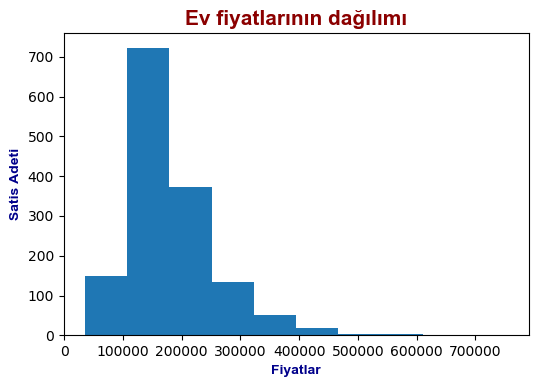

In [13]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(Y)
plt.title("Ev fiyatlarının dağılımı", fontdict = baslik_font)
plt.xlabel("Fiyatlar", fontdict=eksen_font)
plt.ylabel("Satis Adeti", fontdict=eksen_font)
plt.show()

In [15]:
#LinearRegression modeli 
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-1.61542270e+02  4.15752972e-01  1.45942629e+04  5.27629771e+03
  3.55021913e+02  4.73468700e+00  9.04724310e+00  3.12780049e-01
 -9.87986854e-01  8.37203630e+00  1.89999472e+01  2.15046638e+01
 -9.74811344e+00  3.07564975e+01  9.28299225e+03  2.96618099e+03
  5.14535989e+03 -1.53219377e+03 -6.46694664e+03 -1.17533201e+04
  2.58426203e+03  3.82151909e+03  1.28913893e+04 -6.74882356e+00
  2.94080569e+01 -1.17021948e+01  1.18003112e+01  2.45905973e+01
  5.66168742e+01 -4.32632399e+01 -3.91663907e-01 -2.94906996e+02
 -5.23320389e+02 -3.72403746e+04 -4.39342511e+04 -4.89456709e+04
  2.53542636e+04  4.98321767e+04  1.86402647e+04  1.56611927e+04
  6.43409222e+03  5.85495997e+04  3.30462060e+04  7.30400537e+03
  1.90460444e+04  6.80239742e+03 -4.94374159e+03  7.27099217e+03
 -2.50610135e+04]
Sabit değer (bias): 
 327210.1853526349


In [17]:
#Şimdi, aynı modeli statsmodels kullanarak çalıştırıyoruz. Eğer zaten yüklemediyseniz, pip install statsmodels 
#satırını komut satırından çalıştırabilirsiniz.
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        11:10:40   Log-Likelihood:                -17240.
No. Observations:                1460   AIC:                         3.458e+04
Df Residuals:                    1412   BIC:                         3.483e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.272e+05   1.36e+06      0.240      0.811   -2.35e+06       3e+06
MSSubClass        -161.5423     25.186     -6.414      0.000    -210.947    -112.137
LotArea              0.4158      0.096      4.335      0.000       0.228       0.604
OverallQual       1.459e+04   1170.411     12.469      0.000    1.23e+04    1.69e+04
OverallCond       5276.2977    993.560      5.310      0.000    3327.286    7225.309
YearBuilt          355.0219     58.854      6.032      0.000     239.571     470.473
YearRemodAdd         4.7347     67.216      0.070      0.944    -127.119     136.588
BsmtFinSF1           9.0472      2.414      3.747      0.000       4.311      13.783
BsmtFinSF2           0.3128      4.316      0.072      0.942      -8.153       8.779
BsmtUnfSF           -0.9880      2.322     -0.426      0.671      -5.543       3.567
TotalBsmtSF          8.3720      3.255      2.572      0.010       1.986      14.758
1stFlrSF            18.9999      5.860      3.242      0.001       7.504      30.496
2ndFlrSF            21.5047      5.400      3.983      0.000      10.912      32.097
LowQualFinSF        -9.7481     14.085     -0.692      0.489     -37.379      17.882
GrLivArea           30.7565      5.417      5.678      0.000      20.131      41.382
BsmtFullBath      9282.9923   2510.647      3.697      0.000    4357.992    1.42e+04
BsmtHalfBath      2966.1810   3921.897      0.756      0.450   -4727.190    1.07e+04
FullBath          5145.3599   2701.615      1.905      0.057    -154.252    1.04e+04
HalfBath         -1532.1938   2546.113     -0.602      0.547   -6526.764    3462.377
BedroomAbvGr     -6466.9466   1657.758     -3.901      0.000   -9718.881   -3215.012
KitchenAbvGr     -1.175e+04   5054.329     -2.325      0.020   -2.17e+04   -1838.519
TotRmsAbvGrd      2584.2620   1200.286      2.153      0.031     229.726    4938.798
Fireplaces        3821.5191   1689.024      2.263      0.024     508.253    7134.785
GarageCars        1.289e+04   2741.294      4.703      0.000    7513.942    1.83e+04
GarageArea          -6.7488      9.305     -0.725      0.468     -25.001      11.504
WoodDeckSF          29.4081      7.620      3.859      0.000      14.461      44.356
OpenPorchSF        -11.7022     14.445     -0.810      0.418     -40.039      16.634
EnclosedPorch       11.8003     16.158      0.730      0.465     -19.897      43.498
3SsnPorch           24.5906     29.861      0.824      0.410     -33.986      83.167
ScreenPorch         56.6169     16.392      3.454      0.001      24.462      88.772
PoolArea           -43.2632     22.704     -1.906      0.057     -87.800       1.273
MiscVal             -0.3917      1.768     -0.222      0.825      -3.860       3.077
MoSold            -294.9070    330.241     -0.893      0.372    -942.724     352.910
YrSold            -523.